# logistic 回归

class sklearn.linear_model.LogisticRegression(penalty='l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

参数说明

penalty='l2’, 正则化参数（惩罚项），可取值'l1','l2','elasticnet','none'，默认值'l2'。  
dual=False, 对偶或原始公式，对偶公式只适用于l2罚项的liblinear求解器。样本数大于特征数时，默认为False。  
tol=0.0001, 停止迭代的阈值。  
C=1.0, 正则化系数lambda的倒数，取值须大于0。  
fit_intercept=True, 模型是否加入截距项，默认加入截距项。  
intercept_scaling=1, 当求解器为liblinear，且fit_intercept为True时，才会起作用。  
class_weight=None, 类别权重  
random_state=None, 随机种子，solver取值‘sag’或‘liblinear’时起作用。  
solver=’liblinear’,求解器，最优化问题中应用的算法。

- libnear：使用坐标轴下降法来迭代优化损失函数。  
- lbfgs：一种拟牛顿法，利用损失函数的二阶导数（海森矩阵）来迭代优化损失函数，推荐用于较小的数据集。  
- newton-cg：拟牛顿法的一种，利用损失函数的二阶导数（海森矩阵）来迭代优化损失函数。  
- sag：随机平均梯度下降，每次迭代仅使用一部分样本来计算梯度，适合样本量多的情况。  
- saga：是sag的一种变体，支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。  

max_iter=100, 最大迭代次数  
multi_class=’ovr’,多分类问题分类方式选择参数，可取值"ovr"、"multinomial"、"auto"，'ovr'：one vs rest 一对剩余，'multinomial'：many vs many。对于多跟类问题，multinomial 分类相对准确，但速度相对慢。  
verbose=0, 日志冗长度int：冗长度；0：不输出训练过程；1：偶尔输出； >1：对每个子模型都输出。  
warm_start=False, 是否热启动，如果是，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化），bool：热启动，False：默认值。  
n_jobs=None, 并行数，int：个数；-1：跟CPU核数一致；1:默认值  
l1_ratio=None，弹性网络的混合参数，0 <= l1_ratio <= 1，只在penalty='elasticnet'时使用。  

### 二分类问题

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
%matplotlib inline
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [2]:
clf.coef_

array([[  1.54678711e+00,   8.23352559e-02,   1.55276075e-01,
         -8.79367079e-04,  -8.22163107e-02,  -2.85329468e-01,
         -4.58468993e-01,  -2.42749600e-01,  -2.24301857e-01,
         -1.22379599e-02,   6.15455279e-03,   2.92238035e-01,
          1.80011887e-01,  -7.24131937e-02,  -7.77191444e-03,
         -1.44373787e-02,  -6.20589590e-02,  -3.52459954e-02,
         -4.49914397e-02,   3.16257990e-03,   1.18775647e+00,
         -2.28662001e-01,  -2.69895926e-01,  -2.42563451e-02,
         -1.35120118e-01,  -7.09409177e-01,  -1.14965142e+00,
         -4.78814355e-01,  -4.95780257e-01,  -6.67372595e-02]])

In [3]:
clf.score(X_test, y_test)

0.95438596491228067

In [4]:
clf.predict(X_test)[:3]

array([0, 1, 1])

In [5]:
clf.predict_proba(X_test)[:, 0][:3]

array([ 0.9950637 ,  0.02889724,  0.00272001])

In [6]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

In [7]:
auc(fpr, tpr)

0.99182092122255705

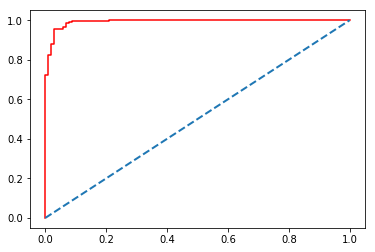

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.show()

### 多分类问题

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

training score: 0.995(multinomial)


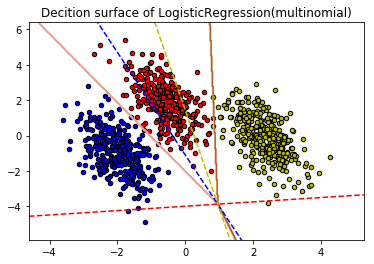

training score: 0.976(ovr)


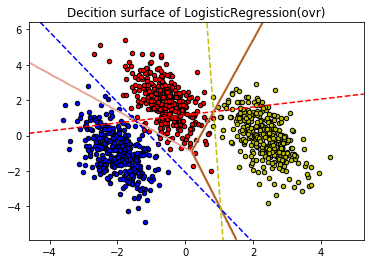

In [11]:
for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42, multi_class=multi_class).fit(X, y)
    # 模型训练得分
    print('training score: %.3f(%s)' % (clf.score(X, y), multi_class))
    # 在图中创建网状物
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 绘制决策边界，对此，将给网状物上的每个点赋予不同的颜色。
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title('Decition surface of LogisticRegression(%s)' % multi_class)
    plt.axis('tight')
    
    # 绘制训练数据点
    colors = 'bry'
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap = plt.cm.Paired, edgecolors='black', s=20)
    # 绘制3个ovr分类器的决策边界
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_
    
    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls='--', color = color)
    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)
        
    plt.show()